# Beautifulsoup with Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [2]:
url = "https://www.hubertiming.com/results/2018MLK"
html = urlopen(url)

In [3]:
soup = BeautifulSoup(html)

In [5]:
title = soup.title
print(title)
print(title.text)    # title is what present over the url tab

<title>Race results for the 2018 MLK Dream Run!</title>
Race results for the 2018 MLK Dream Run!


In [10]:
links = soup.find_all('a', href=True)
for link in links:
    print(link.get('href'))

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2018MLK10K#individual
/results/2018MLK15K#individual
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [11]:
# Printing first 5 rows from the table
allrows = soup.find_all("tr")
print(allrows[:5])      # prints first 5 rows

[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>191</td>
</tr>, <tr>
<td>Male:</td>
<td>78</td>
</tr>, <tr>
<td>Female:</td>
<td>113</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>]


In [12]:
allrows = soup.find_all("tr")
print(allrows[1])      # prints first 1 row

<tr>
<td>Finishers:</td>
<td>191</td>
</tr>


In [14]:
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
print(row_list)      # prints last row

[<td>191</td>, <td>1216</td>, <td>

                    ZULMA OCHOA

                </td>, <td>F</td>, <td>40</td>, <td>GRESHAM</td>, <td>OR</td>, <td>1:43:27</td>, <td>33:22</td>, <td>

                    113 of 113

                </td>, <td>F 40-54</td>, <td>

                    37 of 37

                </td>, <td>0:00</td>, <td>1:43:27</td>]


In [15]:
for cell in row_list:
    print(cell.text)

191
1216


                    ZULMA OCHOA

                
F
40
GRESHAM
OR
1:43:27
33:22


                    113 of 113

                
F 40-54


                    37 of 37

                
0:00
1:43:27


In [18]:
data = []
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    DataRow = []
    
    for cell in row_list:
        DataRow.append(cell.text)
    data.append(DataRow)

print(data)

[[], ['Finishers:', '191'], ['Male:', '78'], ['Female:', '113'], [], ['1', '1191', '\r\n\r\n                    MAX RANDOLPH\r\n\r\n                ', 'M', '29', 'WASHINGTON', 'DC', '16:48', '5:25', '\r\n\r\n                    1 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    1 of 33\r\n\r\n                ', '0:08', '16:56'], ['2', '1080', '\r\n\r\n                    NEED NAME KAISER RUNNER\r\n\r\n                ', 'M', '25', 'PORTLAND', 'OR', '17:31', '5:39', '\r\n\r\n                    2 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    2 of 33\r\n\r\n                ', '0:09', '17:40'], ['3', '1275', '\r\n\r\n                    DAN FRANEK\r\n\r\n                ', 'M', '52', 'PORTLAND', 'OR', '18:15', '5:53', '\r\n\r\n                    3 of 78\r\n\r\n                ', 'M 40-54', '\r\n\r\n                    1 of 27\r\n\r\n                ', '0:07', '18:22'], ['4', '1223', '\r\n\r\n                    PAUL TAYLOR\r\n\r\n         

In [19]:
data = []
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    DataRow = []
    
    for cell in row_list:
        DataRow.append(cell.text.strip())
    data.append(DataRow)

print(data)

[[], ['Finishers:', '191'], ['Male:', '78'], ['Female:', '113'], [], ['1', '1191', 'MAX RANDOLPH', 'M', '29', 'WASHINGTON', 'DC', '16:48', '5:25', '1 of 78', 'M 21-39', '1 of 33', '0:08', '16:56'], ['2', '1080', 'NEED NAME KAISER RUNNER', 'M', '25', 'PORTLAND', 'OR', '17:31', '5:39', '2 of 78', 'M 21-39', '2 of 33', '0:09', '17:40'], ['3', '1275', 'DAN FRANEK', 'M', '52', 'PORTLAND', 'OR', '18:15', '5:53', '3 of 78', 'M 40-54', '1 of 27', '0:07', '18:22'], ['4', '1223', 'PAUL TAYLOR', 'M', '54', 'PORTLAND', 'OR', '18:31', '5:58', '4 of 78', 'M 40-54', '2 of 27', '0:07', '18:38'], ['5', '1245', 'THEO KINMAN', 'M', '22', '', '', '19:31', '6:17', '5 of 78', 'M 21-39', '3 of 33', '0:09', '19:40'], ['6', '1185', 'MELISSA GIRGIS', 'F', '27', 'PORTLAND', 'OR', '19:39', '6:20', '1 of 113', 'F 21-39', '1 of 53', '0:07', '19:46'], ['7', '1251', 'CHARLIE COGGESHALL', 'M', '39', 'PORTLAND', 'OR', '19:51', '6:24', '6 of 78', 'M 21-39', '4 of 33', '0:10', '20:01'], ['8', '1154', 'UNKNOWN RUNNER SEE 

In [21]:
data = []
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    DataRow = []
    
    for cell in row_list:
        DataRow.append(cell.text.strip())
    data.append(DataRow)

titles = data[1]
data = data[2:]
print(titles)
print(data)

['Finishers:', '191']
[['Male:', '78'], ['Female:', '113'], [], ['1', '1191', 'MAX RANDOLPH', 'M', '29', 'WASHINGTON', 'DC', '16:48', '5:25', '1 of 78', 'M 21-39', '1 of 33', '0:08', '16:56'], ['2', '1080', 'NEED NAME KAISER RUNNER', 'M', '25', 'PORTLAND', 'OR', '17:31', '5:39', '2 of 78', 'M 21-39', '2 of 33', '0:09', '17:40'], ['3', '1275', 'DAN FRANEK', 'M', '52', 'PORTLAND', 'OR', '18:15', '5:53', '3 of 78', 'M 40-54', '1 of 27', '0:07', '18:22'], ['4', '1223', 'PAUL TAYLOR', 'M', '54', 'PORTLAND', 'OR', '18:31', '5:58', '4 of 78', 'M 40-54', '2 of 27', '0:07', '18:38'], ['5', '1245', 'THEO KINMAN', 'M', '22', '', '', '19:31', '6:17', '5 of 78', 'M 21-39', '3 of 33', '0:09', '19:40'], ['6', '1185', 'MELISSA GIRGIS', 'F', '27', 'PORTLAND', 'OR', '19:39', '6:20', '1 of 113', 'F 21-39', '1 of 53', '0:07', '19:46'], ['7', '1251', 'CHARLIE COGGESHALL', 'M', '39', 'PORTLAND', 'OR', '19:51', '6:24', '6 of 78', 'M 21-39', '4 of 33', '0:10', '20:01'], ['8', '1154', 'UNKNOWN RUNNER SEE TIMER

In [22]:
df = pd.DataFrame(data)

In [24]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Male:,78,None,None,None,None,None,None,None,None,None,None,None,None
1,Female:,113,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,16:48,5:25,1 of 78,M 21-39,1 of 33,0:08,16:56
4,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,17:31,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40
5,3,1275,DAN FRANEK,M,52,PORTLAND,OR,18:15,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22
6,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,18:31,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38
7,5,1245,THEO KINMAN,M,22,,,19:31,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40
8,6,1185,MELISSA GIRGIS,F,27,PORTLAND,OR,19:39,6:20,1 of 113,F 21-39,1 of 53,0:07,19:46
9,7,1251,CHARLIE COGGESHALL,M,39,PORTLAND,OR,19:51,6:24,6 of 78,M 21-39,4 of 33,0:10,20:01


In [29]:
df.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [34]:
df1 = df[[ 0,  1,  2,  3,  4, 5]]

In [35]:
df1.head(20)

,0,1,2,3,4,5
0,Male:,78,None,None,None,None
1,Female:,113,None,None,None,None
2,None,None,None,None,None,None
3,1,1191,MAX RANDOLPH,M,29,WASHINGTON
4,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND
5,3,1275,DAN FRANEK,M,52,PORTLAND
6,4,1223,PAUL TAYLOR,M,54,PORTLAND
7,5,1245,THEO KINMAN,M,22,
8,6,1185,MELISSA GIRGIS,F,27,PORTLAND
9,7,1251,CHARLIE COGGESHALL,M,39,PORTLAND


In [36]:
#  column headers

In [39]:
col_header = soup.find_all("th")
col_header

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>Age</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Time</th>,
 <th>Chip Pace</th>,
 <th>Gender Place</th>,
 <th>Age Group</th>,
 <th>Age Group Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>]

In [40]:
header_list = []
for head in col_header:
    header_list.append(head.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [41]:
df.columns = header_list

In [42]:
df.head(10)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,Male:,78,None,None,None,None,None,None,None,None,None,None,None,None
1,Female:,113,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,16:48,5:25,1 of 78,M 21-39,1 of 33,0:08,16:56
4,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,17:31,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40
5,3,1275,DAN FRANEK,M,52,PORTLAND,OR,18:15,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22
6,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,18:31,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38
7,5,1245,THEO KINMAN,M,22,,,19:31,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40
8,6,1185,MELISSA GIRGIS,F,27,PORTLAND,OR,19:39,6:20,1 of 113,F 21-39,1 of 53,0:07,19:46
9,7,1251,CHARLIE COGGESHALL,M,39,PORTLAND,OR,19:51,6:24,6 of 78,M 21-39,4 of 33,0:10,20:01


In [43]:
df.tail(10)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
184,182,1114,TRISHA HUTESON,F,46,VANCOUVER,WA,1:03:04,20:20,105 of 113,F 40-54,34 of 37,0:24,1:03:28
185,183,1240,GEANIE ROBINSON,F,60,,,1:04:23,20:46,106 of 113,F 55+,12 of 14,0:32,1:04:55
186,184,1098,MICHELLE HOFFMAN,F,46,EVERETT,WA,1:05:03,20:59,107 of 113,F 40-54,35 of 37,0:30,1:05:33
187,185,1119,SANDY PAGE,F,66,PORTLAND,OR,1:05:04,20:59,108 of 113,F 55+,13 of 14,0:30,1:05:34
188,186,1116,CHRISTINA TURNER,F,39,PORTLAND,OR,1:05:09,21:01,109 of 113,F 21-39,52 of 53,0:28,1:05:37
189,187,1254,CYNTHIA HARRIS,F,64,PORTLAND,OR,1:07:51,21:53,110 of 113,F 55+,14 of 14,1:19,1:09:10
190,188,1085,EBONY LAWRENCE,F,30,PORTLAND,OR,1:08:12,22:00,111 of 113,F 21-39,53 of 53,0:58,1:09:10
191,189,1170,ANTHONY WILLIAMS,M,39,PORTLAND,OR,1:09:11,22:19,78 of 78,M 21-39,33 of 33,0:08,1:09:19
192,190,2087,LEESHA POSEY,F,43,PORTLAND,OR,1:33:53,30:17,112 of 113,F 40-54,36 of 37,0:00,1:33:53
193,191,1216,ZULMA OCHOA,F,40,GRESHAM,OR,1:43:27,33:22,113 of 113,F 40-54,37 of 37,0:00,1:43:27


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            193 non-null    object
 1   Bib              193 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   State            191 non-null    object
 7   Chip Time        191 non-null    object
 8   Chip Pace        191 non-null    object
 9   Gender Place     191 non-null    object
 10  Age Group        191 non-null    object
 11  Age Group Place  191 non-null    object
 12  Time to Start    191 non-null    object
 13  Gun Time         191 non-null    object
dtypes: object(14)
memory usage: 21.3+ KB


In [46]:
df.shape

(194, 14)

In [54]:
df.dropna(axis=0, how="any", inplace = True)

In [55]:
df.shape

(191, 14)

In [56]:
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
3,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,16:48,5:25,1 of 78,M 21-39,1 of 33,0:08,16:56
4,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,17:31,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40
5,3,1275,DAN FRANEK,M,52,PORTLAND,OR,18:15,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22
6,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,18:31,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38
7,5,1245,THEO KINMAN,M,22,,,19:31,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40


<BarContainer object of 191 artists>

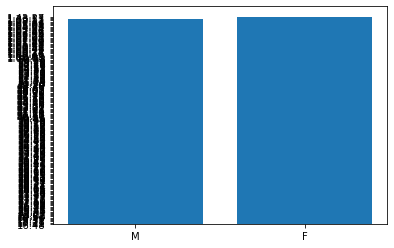

In [58]:
plt.bar(df["Gender"], df["Chip Time"])


In [66]:
df["ChipTime_Minutes"] = (df["Chip Time"] + ":00")

In [67]:
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,ChipTime_Minutes,Chip Tim
3,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,16:48:00,5:25,1 of 78,M 21-39,1 of 33,0:08,16:56,16:48:00,16:48:00
4,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,17:31:00,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40,17:31:00,17:31:00
5,3,1275,DAN FRANEK,M,52,PORTLAND,OR,18:15:00,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22,18:15:00,18:15:00
6,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,18:31:00,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38,18:31:00,18:31:00
7,5,1245,THEO KINMAN,M,22,,,19:31:00,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40,19:31:00,19:31:00


In [70]:
df.drop(columns=["Chip Tim"], inplace=True)

In [71]:
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,ChipTime_Minutes
3,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,16:48:00,5:25,1 of 78,M 21-39,1 of 33,0:08,16:56,16:48:00
4,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,17:31:00,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40,17:31:00
5,3,1275,DAN FRANEK,M,52,PORTLAND,OR,18:15:00,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22,18:15:00
6,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,18:31:00,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38,18:31:00
7,5,1245,THEO KINMAN,M,22,,,19:31:00,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40,19:31:00


In [74]:
df["Total_Minutes"] = pd.to_timedelta(df["ChipTime_Minutes"])

ValueError: expected hh:mm:ss format